# 1. Visualize Scatter Plot every 100 Epochs

In [1]:
# Import modules
import torch
import torch.nn as nn  # to import models
import matplotlib.pyplot as plt

### Define a Module

In [2]:
# Define Artificial Neural Network
'''
- Binary model
- Nums of layers:
  - Input Layer: 2
  - Hidden Layer: 1 (Node 5)
  - Output Layer: 1
- Function
  - Sigmoid Function - between Hidden and Output layer
'''

class SimpleNet(nn.Module):
    
    # Required definition: `__init__()`, `forward()`
    
    def __init__(self):
        
        # Call a parent method
        super(SimpleNet, self).__init__()
        
        # Input Layer -> Hidden Layer
        self.fc1 = nn.Linear(2, 5)  # (Input Layer, Hidden Layer)
        
        # Hidden Layer -> Output Layer
        self.fc2 = nn.Linear(5, 1)  # (Hidden Layer, Output Layer)
        
    def forward(self, x):
        # ReLU Function
        x = torch.relu(self.fc1(x))
        
        # Sigmoid Function
        x = torch.sigmoid(self.fc2(x))
        
        return x

### Generate Data

In [3]:
# Generate data
X = torch.randn(100, 2)  # Rank2 Tensor -> to define True/False
y = ((X[:, 0] > 0) & (X[:, 1] > 0)).float()  # Generate a solution with 'T(1)' and 'F(0)'
#print(X)
print(y)

tensor([1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0.])


### Declare Models

In [4]:
# Define Model
model = SimpleNet()

print(model)
# Result
# - fc1: Input-> Hidden
# - fc2: Hidden -> Output

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


### Define Loss Function and Optimizer

In [5]:
# Define Loss Function
criterion = nn.BCELoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.1)

### Fit Models

Learning has been done!


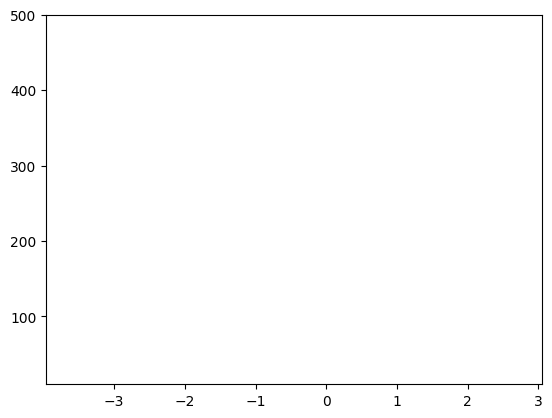

In [10]:
# Fit model
for epoch in range(1000):
    
    # Propagation
    y_pred = model(X)
    #print(y_pred)
    #exit()
    
    # Calculate loss
    loss = criterion (y_pred.squeeze(), y)
    
    # Backpropagation
    optimizer.zero_grad()  # Initialize all weights in optimizer with '0' -> to prevent effects from existing weight values
    loss.backward()        # Perform backpropagation of Loss function
    optimizer.step()       # Update weights of optimizer
    
    
    # Visualization
    if epoch % 10 == 0:
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1],
                    c = y_pred.detach().numpy().squeeze())
        # Save as files
        plt.show()
        #plt.ylim(10, 500) -> TRY LATER
        
print('Learning has been done!')

In [ ]:
# TRY ONE MORE: TO MAKE 'GIF' FILE

# +) ADD ONE LINE: SAVE SCATTER PLOTS AS IMAGE FILES
import imageio

# List of frames
frames = ['frame1.png', 'frame2.png'...]

# Save frames as a GIF file
with imageio.get_writer('animation.gif', mode='I', duration='0.2') as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)